## MOST DAMAGING VARIANTS ANNOTATED: Melanoma sample

In [1]:
# Needed basic packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib_venn import venn3
import time

from tqdm import tqdm_notebook
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()
from tqdm.notebook import tqdm
tqdm.pandas()
from tqdm.notebook import tqdm_notebook
tqdm_notebook.pandas()

## A. Read Annotated and filtered mutations 

#### 1. Melanoma sample (filtered with script and processed with QMAP )

In [2]:
import os, sys

# Paths from VEP output directories
path = "/workspace/projects/sjd_melos/vep/vep_filtering_output/melanoma/"

# These are the files of the variable path
files = os.listdir(path)
files

['chr16.tsv.gz',
 'chr15.tsv.gz',
 'chr21.tsv.gz',
 'chr13.tsv.gz',
 'chrY.tsv.gz',
 'chr14.tsv.gz',
 'chr20.tsv.gz',
 'chr22.tsv.gz',
 'chr19.tsv.gz',
 'chr9.tsv.gz',
 'chr18.tsv.gz',
 'chrX.tsv.gz',
 'chr17.tsv.gz',
 'chr10.tsv.gz',
 'chr12.tsv.gz',
 'chr11.tsv.gz',
 'chr8.tsv.gz',
 'chr7.tsv.gz',
 'chr5.tsv.gz',
 'chr6.tsv.gz',
 'chr4.tsv.gz',
 'chr3.tsv.gz',
 'chr1.tsv.gz',
 'chr2.tsv.gz']

In [3]:
# Perform a chromosome list
chroms = []
for n in range(1,23):
    chroms.append('chr'+str(n))
chroms.append('chrX')    
chroms.append('chrY')  
chroms

['chr1',
 'chr2',
 'chr3',
 'chr4',
 'chr5',
 'chr6',
 'chr7',
 'chr8',
 'chr9',
 'chr10',
 'chr11',
 'chr12',
 'chr13',
 'chr14',
 'chr15',
 'chr16',
 'chr17',
 'chr18',
 'chr19',
 'chr20',
 'chr21',
 'chr22',
 'chrX',
 'chrY']

In [4]:
col = 'Uploaded_variation Location Allele Gene Feature Feature_type Consequence cDNA_position CDS_position Protein_position Amino_acids Codons Existing_variation IMPACT DISTANCE STRAND FLAGS SYMBOL SYMBOL_SOURCE HGNC_ID CANONICAL MANE_SELECT MANE_PLUS_CLINICAL ENSP SOURCE AF AFR_AF AMR_AF EAS_AF EUR_AF SAS_AF CLIN_SIG SOMATIC PHENO gnomADg gnomADg_AF gnomADg_NFE #CHROM POS REF ALT WORSE_conseq ID QUAL FILTER INFO FORMAT NORMAL TUMOR t_AF n_AF t_DP n_DP t_alt_readsn_alt_reads t_ref_reads n_ref_reads VAF mut_type Caller_intersec SAMPLE mut CN CCF'
col_list = col.split()
print(col_list)

['Uploaded_variation', 'Location', 'Allele', 'Gene', 'Feature', 'Feature_type', 'Consequence', 'cDNA_position', 'CDS_position', 'Protein_position', 'Amino_acids', 'Codons', 'Existing_variation', 'IMPACT', 'DISTANCE', 'STRAND', 'FLAGS', 'SYMBOL', 'SYMBOL_SOURCE', 'HGNC_ID', 'CANONICAL', 'MANE_SELECT', 'MANE_PLUS_CLINICAL', 'ENSP', 'SOURCE', 'AF', 'AFR_AF', 'AMR_AF', 'EAS_AF', 'EUR_AF', 'SAS_AF', 'CLIN_SIG', 'SOMATIC', 'PHENO', 'gnomADg', 'gnomADg_AF', 'gnomADg_NFE', '#CHROM', 'POS', 'REF', 'ALT', 'WORSE_conseq', 'ID', 'QUAL', 'FILTER', 'INFO', 'FORMAT', 'NORMAL', 'TUMOR', 't_AF', 'n_AF', 't_DP', 'n_DP', 't_alt_readsn_alt_reads', 't_ref_reads', 'n_ref_reads', 'VAF', 'mut_type', 'Caller_intersec', 'SAMPLE', 'mut', 'CN', 'CCF']


In [5]:
# Define function that reads files based on chrom list and returns a dataframe
variants_df = pd.DataFrame()
for c in chroms: # use the chrom list to read each file chromosome by chromosome
    chr_df = pd.read_csv(path+c+'.tsv.gz', sep="\t")
    variants_df = pd.concat([variants_df,chr_df],ignore_index=True)
variants_df

/tmp/jobs/efiguerola/9960593/ipykernel_1497542/2924879326.py:4: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  chr_df = pd.read_csv(path+c+'.tsv.gz', sep="\t")
/tmp/jobs/efiguerola/9960593/ipykernel_1497542/2924879326.py:4: DtypeWarning: Columns (14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  chr_df = pd.read_csv(path+c+'.tsv.gz', sep="\t")
/tmp/jobs/efiguerola/9960593/ipykernel_1497542/2924879326.py:4: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  chr_df = pd.read_csv(path+c+'.tsv.gz', sep="\t")
/tmp/jobs/efiguerola/9960593/ipykernel_1497542/2924879326.py:4: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  chr_df = pd.read_csv(path+c+'.tsv.gz', sep="\t")
/tmp/jobs/efiguerola/9960593/ipykernel_1497542/2924879326.py:4: DtypeWarning: Columns (15) have mixed types. Specify dtype option 

,Uploaded_variation,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,...,n_alt_reads,t_ref_reads,n_ref_reads,VAF,mut_type,Caller_intersec,SAMPLE,mut,CN,CCF
0,chr1_42155534_GG_AA,chr1:42155534-42155535,AA,ENSG00000044012,ENST00000372581,Transcript,"splice_acceptor_variant,coding_sequence_variant",?-319,?-278,?-93,...,0,105,141,0.110000,MNV,Mutect_SAGE,melanoma,chr1_42155534_GG_AA,2.0363,0.920660
1,chr1_228283017_G_A,chr1:228283017,A,ENSG00000154358,ENST00000680850,Transcript,splice_acceptor_variant,-,-,-,...,0,160,125,0.064327,SNV,Mutect_Strelka,melanoma,chr1_228283017_G_A,2.0404,0.538661
2,chr1_8193986_G_A,chr1:8193986,A,ENSG00000288816,ENST00000684850,Transcript,"splice_acceptor_variant,non_coding_transcript_...",-,-,-,...,0,112,111,0.151515,SNV,Mutect_Strelka,melanoma,chr1_8193986_G_A,2.0363,1.268126
3,chr1_94190083_CC_TT,chr1:94190083-94190084,TT,ENSG00000137962,ENST00000260526,Transcript,"splice_acceptor_variant,coding_sequence_variant",?-1484,?-1282,?-428,...,0,97,127,0.157000,MNV,Mutect_SAGE,melanoma,chr1_94190083_CC_TT,2.0363,1.314032
4,chr1_1355346_C_T,chr1:1355346,T,ENSG00000162576,ENST00000309212,Transcript,splice_acceptor_variant,-,-,-,...,0,141,156,0.107595,SNV,Mutect_Strelka,melanoma,chr1_1355346_C_T,2.1056,0.907986
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1237865,chrY_14359105_G_A,chrY:14359105,A,-,-,-,intergenic_variant,-,-,-,...,0,55,70,0.191176,SNV,Mutect_Strelka,melanoma,chrY_14359105_G_A,1.0305,1.407792
1237866,chrY_14359351_CC_TT,chrY:14359351-14359352,TT,-,-,-,intergenic_variant,-,-,-,...,0,56,63,0.164000,MNV,Mutect_SAGE,melanoma,chrY_14359351_CC_TT,1.0305,1.207669
1237867,chrY_14493075_C_T,chrY:14493075,T,-,-,-,intergenic_variant,-,-,-,...,0,53,48,0.145000,SNV,Strelka_SAGE,melanoma,chrY_14493075_C_T,1.0305,1.067756
1237868,chrY_13591677_C_T,chrY:13591677,T,-,-,-,intergenic_variant,-,-,-,...,0,40,48,0.230769,SNV,Mutect_Strelka,melanoma,chrY_13591677_C_T,1.0305,1.699346


In [6]:
variants_df.columns

Index(['Uploaded_variation', 'Location', 'Allele', 'Gene', 'Feature',
       'Feature_type', 'Consequence', 'cDNA_position', 'CDS_position',
       'Protein_position', 'Amino_acids', 'Codons', 'Existing_variation',
       'IMPACT', 'DISTANCE', 'STRAND', 'FLAGS', 'SYMBOL', 'SYMBOL_SOURCE',
       'HGNC_ID', 'CANONICAL', 'MANE_SELECT', 'MANE_PLUS_CLINICAL', 'ENSP',
       'SOURCE', 'AF', 'AFR_AF', 'AMR_AF', 'EAS_AF', 'EUR_AF', 'SAS_AF',
       'CLIN_SIG', 'SOMATIC', 'PHENO', 'gnomADg', 'gnomADg_AF', 'gnomADg_NFE',
       '#CHROM', 'POS', 'REF', 'ALT', 'WORSE_conseq', 'ID', 'QUAL', 'FILTER',
       'INFO', 'FORMAT', 'NORMAL', 'TUMOR', 't_AF', 'n_AF', 't_DP', 'n_DP',
       't_alt_reads', 'n_alt_reads', 't_ref_reads', 'n_ref_reads', 'VAF',
       'mut_type', 'Caller_intersec', 'SAMPLE', 'mut', 'CN', 'CCF'],
      dtype='object')

In [7]:
# Export tSV table
variants_df.to_csv('/workspace/projects/sjd_melos/MAFs_tables/Mel_common_mutations_callers_VEP_annotated.tsv.gz', sep ='\t', index=None, compression = "gzip")

#### 2. Sarcoma primary and metastasis samples (filtered in notebook)

In [8]:
# Import filtered annotated VEP file with mutation information

sar_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/Sar_common_mutations_callers_VEP_annotated.tsv.gz',sep = "\t")
lung_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/Lung_common_mutations_callers_VEP_annotated.tsv.gz',sep = "\t")
pd.set_option('display.max_columns', None)

display(sar_df)
display(lung_df)

/tmp/jobs/efiguerola/9960593/ipykernel_1497542/2383295914.py:3: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  sar_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/Sar_common_mutations_callers_VEP_annotated.tsv.gz',sep = "\t")
/tmp/jobs/efiguerola/9960593/ipykernel_1497542/2383295914.py:4: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  lung_df = pd.read_csv('/workspace/projects/sjd_melos/MAFs_tables/Lung_common_mutations_callers_VEP_annotated.tsv.gz',sep = "\t")


,Uploaded_variation,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,IMPACT,DISTANCE,STRAND,FLAGS,SYMBOL,SYMBOL_SOURCE,HGNC_ID,CANONICAL,MANE_SELECT,MANE_PLUS_CLINICAL,ENSP,SOURCE,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF,CLIN_SIG,SOMATIC,PHENO,gnomADg,gnomADg_AF,gnomADg_NFE,#CHROM,POS,REF,ALT,WORSE_conseq,ID,QUAL,FILTER,INFO,FORMAT,NORMAL,TUMOR,t_AF,n_AF,t_DP,n_DP,t_alt_reads,n_alt_reads,t_ref_reads,n_ref_reads,VAF,mut_type,Caller_intersec,SAMPLE,mut,CN,CCF,clonality
0,chr3_45035523_G_A,chr3:45035523,A,ENSG00000075914,ENST00000481405,Transcript,"splice_acceptor_variant,non_coding_transcript_...",-,-,-,-,-,rs1697627692,HIGH,-,1,-,EXOSC7,HGNC,HGNC:28112,-,-,-,-,-,-,-,-,-,-,-,-,-,-,rs1697627692,6.57013e-06,-,chr3,45035523,G,A,splice_acceptor_variant,.,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=151,155|40,33...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:156,0:6.507e-03:156:66,0:82,0:151,0:78,78,0,0","0/1:150,73:0.326:223:69,32:76,38:146,70:73,77,...",0.326,0.006507,223,156,73,0,150,156,0.327354,SNV,Mutect_Strelka,sarcoma,chr3_45035523_G_A,2.4582,1.098847,clonal
1,chr9_104825888_C_A,chr9:104825888,A,ENSG00000165029,ENST00000374736,Transcript,splice_acceptor_variant,-,-,-,-,-,-,HIGH,-,-1,-,ABCA1,HGNC,HGNC:29,YES,NM_005502.4,-,ENSP00000363868,-,-,-,-,-,-,-,-,-,-,-,-,-,chr9,104825888,C,A,splice_acceptor_variant,.,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=72,105|35,46;...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:121,0:8.178e-03:121:57,0:60,0:120,0:50,71,0,0","0/1:56,81:0.590:137:23,37:31,39:55,80:22,34,35,46",0.590,0.008178,137,121,81,0,56,121,0.591241,SNV,Mutect_Strelka,sarcoma,chr9_104825888_C_A,1.5944,1.473934,clonal
2,chr3_130855879_A_T,chr3:130855879,T,ENSG00000017260,ENST00000509150,Transcript,"splice_acceptor_variant,non_coding_transcript_...",-,-,-,-,-,-,HIGH,-,1,-,ATP2C1,HGNC,HGNC:13211,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,chr3,130855879,A,T,splice_acceptor_variant,.,235,PASS,RC=GCTGG;RC_IDX=2;RC_LF=ATGTGTCCCT;RC_NM=1;RC_...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:117,0:0:117:3966,0:124,0:0,0,0,0,0,117,1...","./.:32:121,8:0.062:129:3935,258:124,8:7,1,0,0,...",0.062,0.000000,129,117,8,0,121,117,0.062000,SNV,Strelka_SAGE,sarcoma,chr3_130855879_A_T,1.0352,0.119893,subclonal
3,chr15_88797906_T_A,chr15:88797906,A,ENSG00000259676,ENST00000561358,Transcript,"splice_acceptor_variant,non_coding_transcript_...",-,-,-,-,-,-,HIGH,-,-1,-,-,-,-,YES,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,chr15,88797906,T,A,splice_acceptor_variant,.,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=100,85|36,38;...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:98,0:9.714e-03:98:54,0:35,0:97,0:53,45,0,0","0/1:87,74:0.466:161:41,27:36,40:84,73:47,40,36,38",0.466,0.009714,161,98,74,0,87,98,0.459627,SNV,Mutect_Strelka,sarcoma,chr15_88797906_T_A,2.4145,1.522769,clonal
4,chr3_45035523_G_A,chr3:45035523,A,ENSG00000163815,ENST00000296130,Transcript,splice_acceptor_variant,-,-,-,-,-,rs1697627692,HIGH,-,1,-,CLEC3B,HGNC,HGNC:11891,YES,NM_003278.3,-,ENSP00000296130,-,-,-,-,-,-,-,-,-,-,rs1697627692,6.57013e-06,-,chr3,45035523,G,A,splice_acceptor_variant,.,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=151,155|40,33...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:156,0:6.507e-03:156:66,0:82,0:151,0:78,78,0,0","0/1:150,73:0.326:223:69,32:76,38:146,70:73,77,...",0.326,0.006507,223,156,73,0,150,156,0.327354,SNV,Mutect_Strelka,sarcoma,chr3_45035523_G_A,2.4582,1.098847,clonal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27869,chr14_95609258_T_G,chr14:95609258,G,-,-,-,intergenic_variant,-,-,-,-,-,-,MODIFIER,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,chr14,95609258,T,G,intergenic_variant,.,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=102,129|27,35...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:119,0:8.190e-03:119:61,0:56,0:119,0:54,65,0,

,Uploaded_variation,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,IMPACT,DISTANCE,STRAND,FLAGS,SYMBOL,SYMBOL_SOURCE,HGNC_ID,CANONICAL,MANE_SELECT,MANE_PLUS_CLINICAL,ENSP,SOURCE,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF,CLIN_SIG,SOMATIC,PHENO,gnomADg,gnomADg_AF,gnomADg_NFE,#CHROM,POS,REF,ALT,WORSE_conseq,ID,QUAL,FILTER,INFO,FORMAT,NORMAL,TUMOR,t_AF,n_AF,t_DP,n_DP,t_alt_reads,n_alt_reads,t_ref_reads,n_ref_reads,VAF,mut_type,Caller_intersec,SAMPLE,mut,CN,CCF,clonality
0,chr9_104825888_C_A,chr9:104825888,A,ENSG00000165029,ENST00000374736,Transcript,splice_acceptor_variant,-,-,-,-,-,-,HIGH,-,-1,-,ABCA1,HGNC,HGNC:29,YES,NM_005502.4,-,ENSP00000363868,-,-,-,-,-,-,-,-,-,-,-,-,-,chr9,104825888,C,A,splice_acceptor_variant,.,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=78,115|25,26;...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:121,0:8.178e-03:121:57,0:60,0:120,0:50,71,0,0","0/1:72,51:0.421:123:32,29:35,20:70,51:28,44,25,26",0.421,0.008178,123,121,51,0,72,121,0.414634,SNV,Mutect_Strelka,sarcoma_lung,chr9_104825888_C_A,1.5043,0.831051,clonal
1,chr15_22777766_G_T,chr15:22777766,T,ENSG00000274253,ENST00000619611,Transcript,"splice_acceptor_variant,non_coding_transcript_...",-,-,-,-,-,-,HIGH,-,1,-,-,-,-,YES,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,chr15,22777766,G,T,splice_acceptor_variant,.,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=117,92|37,25;...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:116,0:8.627e-03:116:54,0:53,0:113,0:70,46,0,0","0/1:93,62:0.400:155:37,33:46,24:89,59:47,46,37,25",0.400,0.008627,155,116,62,0,93,116,0.400000,SNV,Mutect_Strelka,sarcoma_lung,chr15_22777766_G_T,1.9024,0.960960,clonal
2,chr3_45035523_G_A,chr3:45035523,A,ENSG00000163815,ENST00000296130,Transcript,splice_acceptor_variant,-,-,-,-,-,rs1697627692,HIGH,-,1,-,CLEC3B,HGNC,HGNC:11891,YES,NM_003278.3,-,ENSP00000296130,-,-,-,-,-,-,-,-,-,-,rs1697627692,6.57013e-06,-,chr3,45035523,G,A,splice_acceptor_variant,.,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=138,126|35,44...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:156,0:6.507e-03:156:66,0:82,0:151,0:78,78,0,0","0/1:108,79:0.416:187:49,39:55,33:106,76:60,48,...",0.416,0.006507,187,156,79,0,108,156,0.422460,SNV,Mutect_Strelka,sarcoma_lung,chr3_45035523_G_A,1.9820,1.048545,clonal
3,chr15_88797906_T_A,chr15:88797906,A,ENSG00000259676,ENST00000561358,Transcript,"splice_acceptor_variant,non_coding_transcript_...",-,-,-,-,-,-,HIGH,-,-1,-,-,-,-,YES,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,chr15,88797906,T,A,splice_acceptor_variant,.,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=88,98|20,27;D...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:98,0:9.714e-03:98:54,0:35,0:97,0:53,45,0,0","0/1:88,47:0.351:135:30,22:47,20:84,45:35,53,20,27",0.351,0.009714,135,98,47,0,88,98,0.348148,SNV,Mutect_Strelka,sarcoma_lung,chr15_88797906_T_A,1.9233,0.843667,clonal
4,chr3_45035523_G_A,chr3:45035523,A,ENSG00000075914,ENST00000481405,Transcript,"splice_acceptor_variant,non_coding_transcript_...",-,-,-,-,-,rs1697627692,HIGH,-,1,-,EXOSC7,HGNC,HGNC:28112,-,-,-,-,-,-,-,-,-,-,-,-,-,-,rs1697627692,6.57013e-06,-,chr3,45035523,G,A,splice_acceptor_variant,.,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=138,126|35,44...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:156,0:6.507e-03:156:66,0:82,0:151,0:78,78,0,0","0/1:108,79:0.416:187:49,39:55,33:106,76:60,48,...",0.416,0.006507,187,156,79,0,108,156,0.422460,SNV,Mutect_Strelka,sarcoma_lung,chr3_45035523_G_A,1.9820,1.048545,clonal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25333,chr14_83499105_G_T,chr14:83499105,T,-,-,-,intergenic_variant,-,-,-,-,-,-,MODIFIER,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,chr14,83499105,G,T,intergenic_variant,.,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=92,129|29,41;...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:124,1:8.181e-03:125:60,0:56,0:124,1:52,72,0,1","0/1:97,6

## B. Read IntOGen 2023 drivers list

In [9]:
intogen_df = pd.read_csv('/workspace/datasets/intogen/runs/v2023/20230224_release2023/run/intogen_analysis/unique_drivers.tsv', sep = '\t')
intogen_df
intogen_df2 = pd.read_csv('/workspace/datasets/intogen/runs/v2023/20230224_release2023/run/intogen_analysis/drivers.tsv', sep = '\t')

In [10]:
intogen_list = intogen_df['SYMBOL'].tolist()
intogen_list = sorted(intogen_list)
intogen_list

['ABCC4',
 'ABL1',
 'ABL2',
 'ACKR3',
 'ACSL3',
 'ACSL6',
 'ACSM3',
 'ACVR1',
 'ACVR1B',
 'ACVR2A',
 'AFDN',
 'AFF1',
 'AJUBA',
 'AKAP9',
 'AKT1',
 'AKT3',
 'ALDH2',
 'ALK',
 'ALPK1',
 'AMER1',
 'ANK1',
 'ANKRD11',
 'APC',
 'AR',
 'ARAF',
 'ARHGAP35',
 'ARHGAP5',
 'ARHGEF10',
 'ARHGEF10L',
 'ARHGEF12',
 'ARID1A',
 'ARID1B',
 'ARID2',
 'ARNT',
 'ASXL1',
 'ASXL2',
 'ATF7IP',
 'ATG7',
 'ATM',
 'ATP1A1',
 'ATR',
 'ATRX',
 'AXIN1',
 'AXIN2',
 'B2M',
 'BAP1',
 'BARD1',
 'BAZ1A',
 'BCL10',
 'BCL11A',
 'BCL11B',
 'BCL2',
 'BCL2L12',
 'BCL6',
 'BCL7A',
 'BCL9',
 'BCL9L',
 'BCLAF1',
 'BCOR',
 'BCORL1',
 'BCR',
 'BIRC3',
 'BIRC6',
 'BLM',
 'BMP6',
 'BMPR1A',
 'BRAF',
 'BRCA1',
 'BRCA2',
 'BRD4',
 'BRD7',
 'BTG1',
 'BTG2',
 'BTK',
 'CACNA1D',
 'CADM2',
 'CAMTA1',
 'CANT1',
 'CARD11',
 'CASP8',
 'CASZ1',
 'CBFB',
 'CBL',
 'CBLB',
 'CCDC6',
 'CCND1',
 'CCND2',
 'CCND3',
 'CCNE1',
 'CCR7',
 'CD209',
 'CD274',
 'CD58',
 'CD79B',
 'CDC73',
 'CDH1',
 'CDH10',
 'CDH11',
 'CDK12',
 'CDK4',
 'CDKN1A',
 'CD

In [11]:
len(intogen_list)

619

In [12]:
# These are melanoma drivers
mel_drivers = intogen_df2['SYMBOL'][intogen_df2['CANCER_TYPE'] == 'MEL'].unique().tolist()

In [13]:
mel_drivers

['ACSL6',
 'AFF1',
 'AKT3',
 'APC',
 'ARID2',
 'ATM',
 'ATR',
 'B2M',
 'BAP1',
 'BCL2L12',
 'BCLAF1',
 'BLM',
 'BRAF',
 'BRCA1',
 'BRCA2',
 'BRD7',
 'CADM2',
 'CBL',
 'CDK12',
 'CDK4',
 'CDKN2A',
 'CNOT9',
 'COL1A1',
 'COL6A3',
 'CRNKL1',
 'CSMD3',
 'CTNNA2',
 'CTNNB1',
 'CTNND2',
 'CUX1',
 'CYP2C8',
 'DCC',
 'DDX3X',
 'DICER1',
 'EIF1AX',
 'ELL',
 'EPHA3',
 'ERBB4',
 'ERCC3',
 'ESR1',
 'FAT3',
 'FAT4',
 'GNA11',
 'GNAQ',
 'GRM3',
 'HLA-A',
 'HSP90AB1',
 'IDH1',
 'IKZF1',
 'KIT',
 'KLF6',
 'KMT2C',
 'KMT2D',
 'KNSTRN',
 'KRAS',
 'LIFR',
 'LRP1B',
 'MAP2K1',
 'MDGA2',
 'MECOM',
 'MEN1',
 'MLLT3',
 'MYH11',
 'NBEA',
 'NCOR2',
 'NF1',
 'NF2',
 'NFKBIE',
 'NRAS',
 'NSD1',
 'PBRM1',
 'PDCD1LG2',
 'PIK3CA',
 'PLAG1',
 'POLQ',
 'POT1',
 'PPP6C',
 'PREX2',
 'PRKCB',
 'PTEN',
 'PTPN6',
 'PTPRB',
 'PTPRC',
 'PTPRD',
 'PTPRT',
 'QKI',
 'RAC1',
 'RB1',
 'RET',
 'RGPD3',
 'RGS7',
 'RHOA',
 'ROBO2',
 'RPL5',
 'SETD2',
 'SF3B1',
 'SLC34A2',
 'SMURF2',
 'TP53',
 'TRRAP',
 'TSC2']

## C. Add IntOGen drivers to annotated variants table 

In [14]:
# Add True/False when finding in 'SYMBOL' column an intogen variant in melanoma sample
variants_df['INTOGEN'] = variants_df['SYMBOL'].apply(lambda x: x in intogen_list)

variants_df.groupby('INTOGEN').count()

,Uploaded_variation,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,IMPACT,DISTANCE,STRAND,FLAGS,SYMBOL,SYMBOL_SOURCE,HGNC_ID,CANONICAL,MANE_SELECT,MANE_PLUS_CLINICAL,ENSP,SOURCE,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF,CLIN_SIG,SOMATIC,PHENO,gnomADg,gnomADg_AF,gnomADg_NFE,#CHROM,POS,REF,ALT,WORSE_conseq,ID,QUAL,FILTER,INFO,FORMAT,NORMAL,TUMOR,t_AF,n_AF,t_DP,n_DP,t_alt_reads,n_alt_reads,t_ref_reads,n_ref_reads,VAF,mut_type,Caller_intersec,SAMPLE,mut,CN,CCF
INTOGEN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326
True,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544


In [15]:
intogen_var = len(variants_df[variants_df['INTOGEN'] == True])
notintogen_var = len(variants_df[variants_df['INTOGEN'] == False])

In [16]:
# Add True/False when finding in 'SYMBOL' column an intogen variant in sarcoma primary sample
sar_df['INTOGEN'] = sar_df['SYMBOL'].apply(lambda x: x in intogen_list)

sar_df.groupby('INTOGEN').count()

,Uploaded_variation,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,IMPACT,DISTANCE,STRAND,FLAGS,SYMBOL,SYMBOL_SOURCE,HGNC_ID,CANONICAL,MANE_SELECT,MANE_PLUS_CLINICAL,ENSP,SOURCE,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF,CLIN_SIG,SOMATIC,PHENO,gnomADg,gnomADg_AF,gnomADg_NFE,#CHROM,POS,REF,ALT,WORSE_conseq,ID,QUAL,FILTER,INFO,FORMAT,NORMAL,TUMOR,t_AF,n_AF,t_DP,n_DP,t_alt_reads,n_alt_reads,t_ref_reads,n_ref_reads,VAF,mut_type,Caller_intersec,SAMPLE,mut,CN,CCF,clonality
INTOGEN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219,27219
True,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655,655


In [17]:
s_intogen_var = len(sar_df[sar_df['INTOGEN'] == True])
s_notintogen_var = len(sar_df[sar_df['INTOGEN'] == False])
print(s_intogen_var, s_notintogen_var)

655 27219


In [18]:
# Add True/False when finding in 'SYMBOL' column an intogen variant in sarcoma metastasis sample
lung_df['INTOGEN'] = lung_df['SYMBOL'].apply(lambda x: x in intogen_list)

lung_df.groupby('INTOGEN').count()

,Uploaded_variation,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,IMPACT,DISTANCE,STRAND,FLAGS,SYMBOL,SYMBOL_SOURCE,HGNC_ID,CANONICAL,MANE_SELECT,MANE_PLUS_CLINICAL,ENSP,SOURCE,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF,CLIN_SIG,SOMATIC,PHENO,gnomADg,gnomADg_AF,gnomADg_NFE,#CHROM,POS,REF,ALT,WORSE_conseq,ID,QUAL,FILTER,INFO,FORMAT,NORMAL,TUMOR,t_AF,n_AF,t_DP,n_DP,t_alt_reads,n_alt_reads,t_ref_reads,n_ref_reads,VAF,mut_type,Caller_intersec,SAMPLE,mut,CN,CCF,clonality
INTOGEN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740,24740
True,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598,598


In [19]:
l_intogen_var = len(lung_df[lung_df['INTOGEN'] == True])
l_notintogen_var = len(lung_df[lung_df['INTOGEN'] == False])
print(l_intogen_var, l_notintogen_var)

598 24740


### D. Represent variants that are in intogen drivers

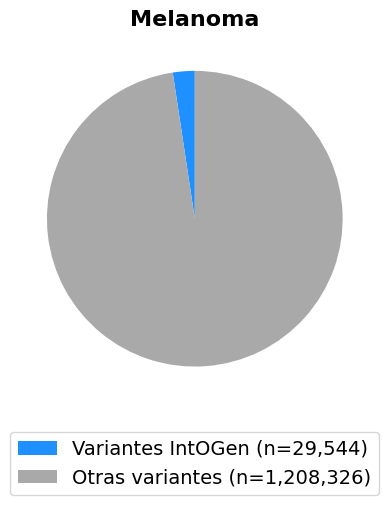

In [20]:
# For melanoma sample

var = [intogen_var, notintogen_var]
mylabels = ['Variantes IntOGen (n=29,544)','Otras variantes (n=1,208,326)']
mycolors = ['dodgerblue', 'darkgrey'] 

plt.pie(var, colors= mycolors, shadow=False, startangle=90, textprops={'fontsize': 16})
plt.legend(mylabels,loc = 'upper center', bbox_to_anchor=(0.5, -0.05), fontsize=14)
plt.title('Melanoma', fontsize = 16, weight='bold')
plt.show
plt.savefig('/workspace/projects/sjd_melos/exports_images/intogen_melanoma_mutations.png',dpi=300,transparent=True, format='png', bbox_inches='tight')

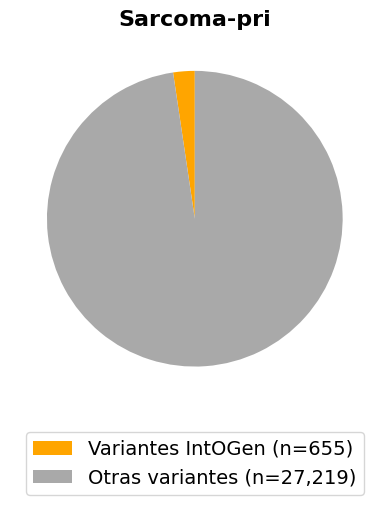

In [21]:
# For sarcoma primary sample

var = [s_intogen_var, s_notintogen_var]
mylabels = ['Variantes IntOGen (n=655)','Otras variantes (n=27,219)']
mycolors = ['orange', 'darkgrey'] 

plt.pie(var, colors= mycolors, shadow=False, startangle=90, textprops={'fontsize': 16})
plt.legend(mylabels,loc = 'upper center', bbox_to_anchor=(0.5, -0.05), fontsize=14)
plt.title('Sarcoma-pri', fontsize = 16, weight='bold')
plt.show
plt.savefig('/workspace/projects/sjd_melos/exports_images/intogen_sarcoma_mutations.png',dpi=300,transparent=True, format='png', bbox_inches='tight')

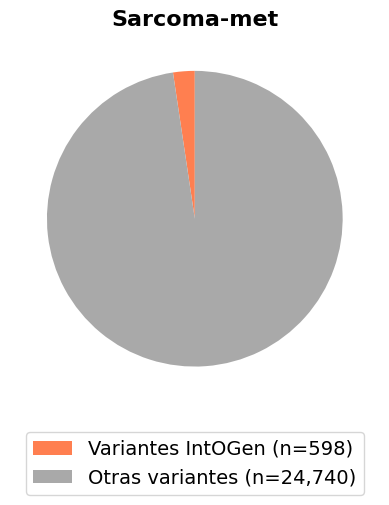

In [22]:
# For sarcoma primary sample

var = [l_intogen_var, l_notintogen_var]
mylabels = ['Variantes IntOGen (n=598)','Otras variantes (n=24,740)']
mycolors = ['coral', 'darkgrey'] 

plt.pie(var, colors= mycolors, shadow=False, startangle=90, textprops={'fontsize': 16})
plt.legend(mylabels,loc = 'upper center', bbox_to_anchor=(0.5, -0.05), fontsize=14)
plt.title('Sarcoma-met', fontsize = 16, weight='bold')
plt.show
plt.savefig('/workspace/projects/sjd_melos/exports_images/intogen_lung_mutations.png',dpi=300,transparent=True, format='png', bbox_inches='tight')

In [23]:
variants_df.columns

Index(['Uploaded_variation', 'Location', 'Allele', 'Gene', 'Feature',
       'Feature_type', 'Consequence', 'cDNA_position', 'CDS_position',
       'Protein_position', 'Amino_acids', 'Codons', 'Existing_variation',
       'IMPACT', 'DISTANCE', 'STRAND', 'FLAGS', 'SYMBOL', 'SYMBOL_SOURCE',
       'HGNC_ID', 'CANONICAL', 'MANE_SELECT', 'MANE_PLUS_CLINICAL', 'ENSP',
       'SOURCE', 'AF', 'AFR_AF', 'AMR_AF', 'EAS_AF', 'EUR_AF', 'SAS_AF',
       'CLIN_SIG', 'SOMATIC', 'PHENO', 'gnomADg', 'gnomADg_AF', 'gnomADg_NFE',
       '#CHROM', 'POS', 'REF', 'ALT', 'WORSE_conseq', 'ID', 'QUAL', 'FILTER',
       'INFO', 'FORMAT', 'NORMAL', 'TUMOR', 't_AF', 'n_AF', 't_DP', 'n_DP',
       't_alt_reads', 'n_alt_reads', 't_ref_reads', 'n_ref_reads', 'VAF',
       'mut_type', 'Caller_intersec', 'SAMPLE', 'mut', 'CN', 'CCF', 'INTOGEN'],
      dtype='object')

In [24]:
variants_df.groupby(['INTOGEN']).count()

,Uploaded_variation,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,IMPACT,DISTANCE,STRAND,FLAGS,SYMBOL,SYMBOL_SOURCE,HGNC_ID,CANONICAL,MANE_SELECT,MANE_PLUS_CLINICAL,ENSP,SOURCE,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF,CLIN_SIG,SOMATIC,PHENO,gnomADg,gnomADg_AF,gnomADg_NFE,#CHROM,POS,REF,ALT,WORSE_conseq,ID,QUAL,FILTER,INFO,FORMAT,NORMAL,TUMOR,t_AF,n_AF,t_DP,n_DP,t_alt_reads,n_alt_reads,t_ref_reads,n_ref_reads,VAF,mut_type,Caller_intersec,SAMPLE,mut,CN,CCF
INTOGEN,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326,1208326
True,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544,29544


In [25]:
# Check information based on these variants 

# In melanoma sample
cols= ['Uploaded_variation','WORSE_conseq','Amino_acids', 'SYMBOL', 'INTOGEN']
print('These Melanoma variants are in Intogen table:')
display(variants_df[cols][variants_df['INTOGEN']==True])

These Melanoma variants are in Intogen table:


,Uploaded_variation,WORSE_conseq,Amino_acids,SYMBOL,INTOGEN
24,chr1_149009792_G_T,splice_donor_variant,-,PDE4DIP,True
28,chr1_186363386_G_A,stop_gained,Q/*,TPR,True
42,chr1_17687590_CC_TT,stop_gained,HQ/H*,ARHGEF10L,True
56,chr1_10665398_GG_AA,stop_gained,DQ/D*,CASZ1,True
85,chr1_186356349_G_A,missense_variant,R/C,TPR,True
...,...,...,...,...,...
1217446,chrX_53172989_C_T,downstream_gene_variant,-,KDM5C,True
1217451,chrX_12981754_C_T,downstream_gene_variant,-,TMSB4X,True
1217862,chrX_48695227_GG_AA,downstream_gene_variant,-,WAS,True
1217915,chrX_1459169_C_T,downstream_gene_variant,-,P2RY8,True


In [26]:
# In sarcoma primary sample
cols= ['Uploaded_variation','WORSE_conseq','Amino_acids', 'SYMBOL', 'INTOGEN']
print('These Sarcoma primary variants are in Intogen table:')
display(sar_df[cols][sar_df['INTOGEN']==True])

These Sarcoma primary variants are in Intogen table:


,Uploaded_variation,WORSE_conseq,Amino_acids,SYMBOL,INTOGEN
9,chr17_7674858_C_T,splice_donor_variant,-,TP53,True
16,chr18_55229024_C_A,stop_gained,E/*,TCF4,True
31,chr8_112859224_A_T,missense_variant,F/Y,CSMD3,True
44,chr11_92799095_A_G,missense_variant,I/V,FAT3,True
68,chr3_53188850_G_C,missense_variant,A/P,PRKCD,True
...,...,...,...,...,...
17280,chr22_29301639_A_T,downstream_gene_variant,-,EWSR1,True
17322,chr6_36688460_G_-,downstream_gene_variant,-,CDKN1A,True
17622,chr8_108160859_G_T,downstream_gene_variant,-,EIF3E,True
17987,chr3_86077539_G_T,downstream_gene_variant,-,CADM2,True


In [27]:
# In sarcoma metastasis sample
cols= ['Uploaded_variation','WORSE_conseq','Amino_acids', 'SYMBOL', 'INTOGEN']
print('These Sarcoma metastasis variants are in Intogen table:')
display(lung_df[cols][lung_df['INTOGEN']==True])

These Sarcoma metastasis variants are in Intogen table:


,Uploaded_variation,WORSE_conseq,Amino_acids,SYMBOL,INTOGEN
9,chr17_7674858_C_T,splice_donor_variant,-,TP53,True
13,chr18_55229024_C_A,stop_gained,E/*,TCF4,True
29,chr3_186048710_C_T,missense_variant,D/N,ETV5,True
41,chr4_186599898_C_A,missense_variant,G/C,FAT1,True
51,chr19_17839483_G_A,missense_variant,P/S,JAK3,True
...,...,...,...,...,...
16089,chr17_76733731_C_T,downstream_gene_variant,-,SRSF2,True
16304,chr9_21963491_T_C,downstream_gene_variant,-,CDKN2A,True
16420,chr2_32619108_A_T,downstream_gene_variant,-,BIRC6,True
16424,chr8_108160859_G_T,downstream_gene_variant,-,EIF3E,True


### E. Add damage types based on dictionary and filter those genes that contain these variants

In [28]:
damage_dict = {'truncating':
                 ['transcript_ablation','splice_acceptor_variant','splice_donor_variant','stop_gained','frameshift_variant','stop_lost','start_lost','transcript_amplification'],
                'miss_inframe':
                 ['inframe_insertion','inframe_deletion','missense_variant'],
                'other':
                 ['protein_altering_variant','splice_region_variant','incomplete_terminal_codon_variant','start_retained_variant','stop_retained_variant']}

In [29]:
def annot_damage(x):
    annot_dam = ''
    for dam in damage_dict.keys():
        if x in damage_dict[dam]:
            annot_dam = dam
            return annot_dam
    if annot_dam == '':
        return annot_dam

# Apply functions in samples
variants_df['damage'] = variants_df['WORSE_conseq'].apply(lambda x: annot_damage(x))
sar_df['damage'] = sar_df['WORSE_conseq'].apply(lambda x: annot_damage(x))
lung_df['damage'] = lung_df['WORSE_conseq'].apply(lambda x: annot_damage(x))

In [30]:
# Show variants that are in intogen and are damaging

# In melanoma and show how many they are
print('These variants are in IntOGen drivers and are damaging in Melanoma:')
display(variants_df[['SYMBOL','INTOGEN','Uploaded_variation','WORSE_conseq','damage','CCF']][(variants_df['damage'].isin(['truncating','miss_inframe','other'])) & (variants_df['INTOGEN'] == True)])
display(len(variants_df[['SYMBOL','INTOGEN','Uploaded_variation','WORSE_conseq','damage','CCF']][(variants_df['damage'].isin(['truncating','miss_inframe','other'])) & (variants_df['INTOGEN'] == True)]))

# In sarcoma primary and show how many they are
print('These variants are in IntOGen drivers and are damaging in Sarcoma primary:')
display(sar_df[['SYMBOL','INTOGEN','Uploaded_variation','WORSE_conseq','damage','CCF']][(sar_df['damage'].isin(['truncating','miss_inframe','other'])) & (sar_df['INTOGEN'] == True)])
display(len(sar_df[['SYMBOL','INTOGEN','Uploaded_variation','WORSE_conseq','damage','CCF']][(sar_df['damage'].isin(['truncating','miss_inframe','other'])) & (sar_df['INTOGEN'] == True)]))

# In sarcoma metastasis and show how many they are
print('These variants are in IntOGen drivers and are damaging in Sarcoma metastasis:')
display(lung_df[['SYMBOL','INTOGEN','Uploaded_variation','WORSE_conseq','damage','CCF']][(lung_df['damage'].isin(['truncating','miss_inframe','other'])) & (lung_df['INTOGEN'] == True)])
display(len(lung_df[['SYMBOL','INTOGEN','Uploaded_variation','WORSE_conseq','damage','CCF']][(lung_df['damage'].isin(['truncating','miss_inframe','other'])) & (lung_df['INTOGEN'] == True)]))


These variants are in IntOGen drivers and are damaging in Melanoma:


,SYMBOL,INTOGEN,Uploaded_variation,WORSE_conseq,damage,CCF
24,PDE4DIP,True,chr1_149009792_G_T,splice_donor_variant,truncating,1.193433
28,TPR,True,chr1_186363386_G_A,stop_gained,truncating,1.392339
42,ARHGEF10L,True,chr1_17687590_CC_TT,stop_gained,truncating,1.021095
56,CASZ1,True,chr1_10665398_GG_AA,stop_gained,truncating,0.920660
85,TPR,True,chr1_186356349_G_A,missense_variant,miss_inframe,1.080263
...,...,...,...,...,...,...
1200198,MED12,True,chrX_71125657_C_T,splice_region_variant,other,1.894260
1200201,KDM6A,True,chrX_45062640_C_T,splice_region_variant,other,1.551843
1200204,ZMYM3,True,chrX_71243090_G_A,splice_region_variant,other,1.102858
1200205,BTK,True,chrX_101374637_G_A,splice_region_variant,other,1.611713


438

These variants are in IntOGen drivers and are damaging in Sarcoma primary:


,SYMBOL,INTOGEN,Uploaded_variation,WORSE_conseq,damage,CCF
9,TP53,True,chr17_7674858_C_T,splice_donor_variant,truncating,1.369557
16,TCF4,True,chr18_55229024_C_A,stop_gained,truncating,0.958331
31,CSMD3,True,chr8_112859224_A_T,missense_variant,miss_inframe,1.089479
44,FAT3,True,chr11_92799095_A_G,missense_variant,miss_inframe,1.007776
68,PRKCD,True,chr3_53188850_G_C,missense_variant,miss_inframe,1.141295
79,CSMD3,True,chr8_112318845_A_T,missense_variant,miss_inframe,0.562669
84,JAK3,True,chr19_17839483_G_A,missense_variant,miss_inframe,1.071468
96,FAT1,True,chr4_186599898_C_A,missense_variant,miss_inframe,0.704265
98,AXIN2,True,chr17_65537586_C_T,missense_variant,miss_inframe,0.087715
129,TP53,True,chr17_7675216_C_A,missense_variant,miss_inframe,0.140256


13

These variants are in IntOGen drivers and are damaging in Sarcoma metastasis:


,SYMBOL,INTOGEN,Uploaded_variation,WORSE_conseq,damage,CCF
9,TP53,True,chr17_7674858_C_T,splice_donor_variant,truncating,1.084121
13,TCF4,True,chr18_55229024_C_A,stop_gained,truncating,0.749031
29,ETV5,True,chr3_186048710_C_T,missense_variant,miss_inframe,0.386839
41,FAT1,True,chr4_186599898_C_A,missense_variant,miss_inframe,0.461626
51,JAK3,True,chr19_17839483_G_A,missense_variant,miss_inframe,1.086103
81,RUNX1,True,chr21_34859519_G_T,missense_variant,miss_inframe,0.466393
84,TP53,True,chr17_7674948_T_A,missense_variant,miss_inframe,1.200627
86,CSMD3,True,chr8_112859224_A_T,missense_variant,miss_inframe,1.090982
98,PRKCD,True,chr3_53188850_G_C,missense_variant,miss_inframe,1.060021
127,FOXA2,True,chr20_22582116_A_T,missense_variant,miss_inframe,0.430252


11

In [31]:
# Export tSV table
variants_df.to_csv('/workspace/projects/sjd_melos/MAFs_tables/Mel_VEP_Annotated_variants_Damage.tsv.gz', sep ='\t', index=None, compression = "gzip")
sar_df.to_csv('/workspace/projects/sjd_melos/MAFs_tables/Sar_VEP_Annotated_variants_Damage.tsv.gz', sep ='\t', index=None, compression = "gzip")
lung_df.to_csv('/workspace/projects/sjd_melos/MAFs_tables/Sar_VEP_Annotated_variants_Damage.tsv.gz', sep ='\t', index=None, compression = "gzip")

### F. Represent genes that are in intogen list and are protein affected

In [32]:
variants_df[(variants_df['INTOGEN'] == True)].groupby('SYMBOL').count()

,Uploaded_variation,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,IMPACT,DISTANCE,STRAND,FLAGS,SYMBOL_SOURCE,HGNC_ID,CANONICAL,MANE_SELECT,MANE_PLUS_CLINICAL,ENSP,SOURCE,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF,CLIN_SIG,SOMATIC,PHENO,gnomADg,gnomADg_AF,gnomADg_NFE,#CHROM,POS,REF,ALT,WORSE_conseq,ID,QUAL,FILTER,INFO,FORMAT,NORMAL,TUMOR,t_AF,n_AF,t_DP,n_DP,t_alt_reads,n_alt_reads,t_ref_reads,n_ref_reads,VAF,mut_type,Caller_intersec,SAMPLE,mut,CN,CCF,INTOGEN,damage
SYMBOL,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ABCC4,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71,71
ABL1,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22
ABL2,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34
ACKR3,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
ACSL3,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZNF90,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
ZNF93,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
ZNRF3,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41,41


In [33]:
num_intogen_gene_list = sorted(intogen_df['SYMBOL'].unique().tolist())

In [34]:
num_i_genes = len(num_intogen_gene_list)
print(num_i_genes)

619


In [35]:
# Show genes that have protein damaging variants in samples
print('These are the variants in Melanoma that are in Intogen drivers that cause protein damage')
display(variants_df[(variants_df['INTOGEN'] == True) & (variants_df['damage'] != '')].groupby('SYMBOL').count())

print('These are the variants in Sarcoma-primary sample that are in Intogen drivers that cause protein damage')
display(sar_df[(sar_df['INTOGEN'] == True) & (sar_df['damage'] != '')].groupby('SYMBOL').count())

print('These are the variants in Sarcoma-primary sample that are in Intogen drivers that cause protein damage')
display(lung_df[(lung_df['INTOGEN'] == True) & (lung_df['damage'] != '')].groupby('SYMBOL').count())

These are the variants in Melanoma that are in Intogen drivers that cause protein damage


,Uploaded_variation,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,IMPACT,DISTANCE,STRAND,FLAGS,SYMBOL_SOURCE,HGNC_ID,CANONICAL,MANE_SELECT,MANE_PLUS_CLINICAL,ENSP,SOURCE,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF,CLIN_SIG,SOMATIC,PHENO,gnomADg,gnomADg_AF,gnomADg_NFE,#CHROM,POS,REF,ALT,WORSE_conseq,ID,QUAL,FILTER,INFO,FORMAT,NORMAL,TUMOR,t_AF,n_AF,t_DP,n_DP,t_alt_reads,n_alt_reads,t_ref_reads,n_ref_reads,VAF,mut_type,Caller_intersec,SAMPLE,mut,CN,CCF,INTOGEN,damage
SYMBOL,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ACVR1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
AFF1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
ALK,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
ALPK1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
ANK1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZEB1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
ZMYM3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
ZNF331,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


These are the variants in Sarcoma-primary sample that are in Intogen drivers that cause protein damage


,Uploaded_variation,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,IMPACT,DISTANCE,STRAND,FLAGS,SYMBOL_SOURCE,HGNC_ID,CANONICAL,MANE_SELECT,MANE_PLUS_CLINICAL,ENSP,SOURCE,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF,CLIN_SIG,SOMATIC,PHENO,gnomADg,gnomADg_AF,gnomADg_NFE,#CHROM,POS,REF,ALT,WORSE_conseq,ID,QUAL,FILTER,INFO,FORMAT,NORMAL,TUMOR,t_AF,n_AF,t_DP,n_DP,t_alt_reads,n_alt_reads,t_ref_reads,n_ref_reads,VAF,mut_type,Caller_intersec,SAMPLE,mut,CN,CCF,clonality,INTOGEN,damage
SYMBOL,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AXIN2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
CSMD3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
ETV5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
FAT1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
FAT3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
FOXA2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
JAK3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
PRKCD,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
TCF4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


These are the variants in Sarcoma-primary sample that are in Intogen drivers that cause protein damage


,Uploaded_variation,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,IMPACT,DISTANCE,STRAND,FLAGS,SYMBOL_SOURCE,HGNC_ID,CANONICAL,MANE_SELECT,MANE_PLUS_CLINICAL,ENSP,SOURCE,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF,CLIN_SIG,SOMATIC,PHENO,gnomADg,gnomADg_AF,gnomADg_NFE,#CHROM,POS,REF,ALT,WORSE_conseq,ID,QUAL,FILTER,INFO,FORMAT,NORMAL,TUMOR,t_AF,n_AF,t_DP,n_DP,t_alt_reads,n_alt_reads,t_ref_reads,n_ref_reads,VAF,mut_type,Caller_intersec,SAMPLE,mut,CN,CCF,clonality,INTOGEN,damage
SYMBOL,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
CSMD3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
ETV5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
FAT1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
FAT3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
FOXA2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
JAK3,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
PRKCD,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
RUNX1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
TCF4,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [36]:
# Store the number of genes that have protein damaging variants in samples
num_tumor_i_genes = len(variants_df[(variants_df['INTOGEN'] == True) & (variants_df['damage'] != '')].groupby('SYMBOL').count())
print(num_tumor_i_genes)

num_sar_i_genes = len(sar_df[(sar_df['INTOGEN'] == True) & (sar_df['damage'] != '')].groupby('SYMBOL').count())
print(num_sar_i_genes)

num_lung_i_genes = len(lung_df[(lung_df['INTOGEN'] == True) & (lung_df['damage'] != '')].groupby('SYMBOL').count())
print(num_lung_i_genes)

235
10
10


In [37]:
num_nontumor_i_genes = num_i_genes - num_tumor_i_genes - num_sar_i_genes - num_lung_i_genes
print(num_nontumor_i_genes)

364


In [38]:
# This is the percentage of genes in IntOGen that contain a driver mutation in Melanoma sample 
print('Melanoma: ', num_tumor_i_genes/num_i_genes * 100)
print('Sarcoma-pri: ', num_sar_i_genes/num_i_genes * 100)
print('Sarcoma-met: ', num_lung_i_genes/num_i_genes * 100)

Melanoma:  37.964458804523424
Sarcoma-pri:  1.615508885298869
Sarcoma-met:  1.615508885298869


<function matplotlib.pyplot.show(close=None, block=None)>

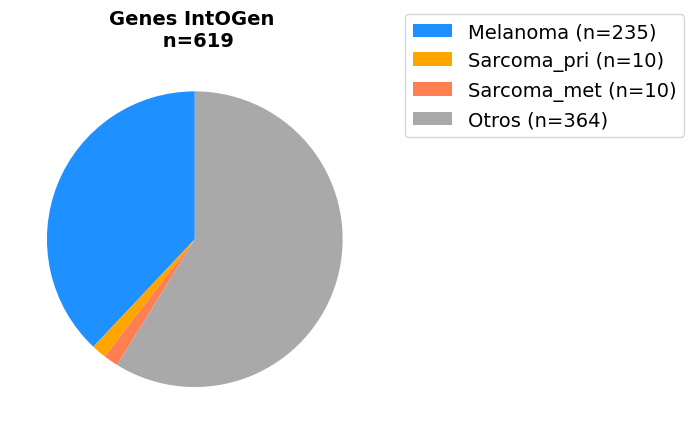

In [39]:
var = [num_tumor_i_genes, num_sar_i_genes, num_lung_i_genes, num_nontumor_i_genes]
mylabels = ['Melanoma (n=235)','Sarcoma_pri (n=10)', 'Sarcoma_met (n=10)', 'Otros (n=364)']
mycolors = ['dodgerblue', 'orange', 'coral',  'darkgrey'] 

plt.pie(var, colors= mycolors, shadow=False, startangle=90, textprops={'fontsize': 16})
plt.legend(mylabels,loc = 'lower right', bbox_to_anchor=(1.85,0.75), fontsize=14)
plt.title('Genes IntOGen \n n=619', fontsize = 14, weight='bold')
plt.savefig('/workspace/projects/sjd_melos/exports_images/intogen_genes_allsamples.png',dpi=300,transparent=True, format='png', bbox_inches='tight')
plt.show

### G. Represent number variants that are damaging included as intogen variants

In [40]:
# Explore damage annotated types in samples
print('Melanoma protein annotated damage data: ')
display(variants_df[variants_df['INTOGEN'] == True].groupby('damage').count())

print('Sarcoma-primary protein annotated damage data: ')
display(sar_df[sar_df['INTOGEN'] == True].groupby('damage').count())

print('Sarcoma-metastasis protein annotated damage data: ')
display(lung_df[lung_df['INTOGEN'] == True].groupby('damage').count())

Melanoma protein annotated damage data: 


,Uploaded_variation,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,IMPACT,DISTANCE,STRAND,FLAGS,SYMBOL,SYMBOL_SOURCE,HGNC_ID,CANONICAL,MANE_SELECT,MANE_PLUS_CLINICAL,ENSP,SOURCE,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF,CLIN_SIG,SOMATIC,PHENO,gnomADg,gnomADg_AF,gnomADg_NFE,#CHROM,POS,REF,ALT,WORSE_conseq,ID,QUAL,FILTER,INFO,FORMAT,NORMAL,TUMOR,t_AF,n_AF,t_DP,n_DP,t_alt_reads,n_alt_reads,t_ref_reads,n_ref_reads,VAF,mut_type,Caller_intersec,SAMPLE,mut,CN,CCF,INTOGEN
damage,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106,29106
miss_inframe,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367,367
other,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37,37
truncating,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34,34


Sarcoma-primary protein annotated damage data: 


,Uploaded_variation,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,IMPACT,DISTANCE,STRAND,FLAGS,SYMBOL,SYMBOL_SOURCE,HGNC_ID,CANONICAL,MANE_SELECT,MANE_PLUS_CLINICAL,ENSP,SOURCE,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF,CLIN_SIG,SOMATIC,PHENO,gnomADg,gnomADg_AF,gnomADg_NFE,#CHROM,POS,REF,ALT,WORSE_conseq,ID,QUAL,FILTER,INFO,FORMAT,NORMAL,TUMOR,t_AF,n_AF,t_DP,n_DP,t_alt_reads,n_alt_reads,t_ref_reads,n_ref_reads,VAF,mut_type,Caller_intersec,SAMPLE,mut,CN,CCF,clonality,INTOGEN
damage,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642,642
miss_inframe,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11
truncating,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


Sarcoma-metastasis protein annotated damage data: 


,Uploaded_variation,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,IMPACT,DISTANCE,STRAND,FLAGS,SYMBOL,SYMBOL_SOURCE,HGNC_ID,CANONICAL,MANE_SELECT,MANE_PLUS_CLINICAL,ENSP,SOURCE,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF,CLIN_SIG,SOMATIC,PHENO,gnomADg,gnomADg_AF,gnomADg_NFE,#CHROM,POS,REF,ALT,WORSE_conseq,ID,QUAL,FILTER,INFO,FORMAT,NORMAL,TUMOR,t_AF,n_AF,t_DP,n_DP,t_alt_reads,n_alt_reads,t_ref_reads,n_ref_reads,VAF,mut_type,Caller_intersec,SAMPLE,mut,CN,CCF,clonality,INTOGEN
damage,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587,587
miss_inframe,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9,9
truncating,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


In [41]:
# Count each type of damage in samples and store it to represent data

# For melanoma
print('For melanoma:')
i2_tr = len(variants_df[(variants_df['damage'].isin(['truncating']))&(variants_df['INTOGEN']==True)])
i2_m = len(variants_df[(variants_df['damage'].isin(['miss_inframe']))&(variants_df['INTOGEN']==True)])
i2_o = len(variants_df[(variants_df['damage'].isin(['other']))&(variants_df['INTOGEN']==True)])
i2_tr + i2_m +i2_o

For melanoma:


438

In [42]:
# For sarcoma primary:
print('For sarcoma primary: ')
i2_tr_sar = len(sar_df[(sar_df['damage'].isin(['truncating']))&(sar_df['INTOGEN']==True)])
i2_m_sar = len(sar_df[(sar_df['damage'].isin(['miss_inframe']))&(sar_df['INTOGEN']==True)])
i2_o_sar = len(sar_df[(sar_df['damage'].isin(['other']))&(sar_df['INTOGEN']==True)])
i2_tr_sar + i2_m_sar + i2_o_sar

For sarcoma primary: 


13

In [43]:
# For sarcoma metastasis:
print('For sarcoma primary: ')
i2_tr_lung = len(lung_df[(lung_df['damage'].isin(['truncating']))&(lung_df['INTOGEN']==True)])
i2_m_lung = len(lung_df[(lung_df['damage'].isin(['miss_inframe']))&(lung_df['INTOGEN']==True)])
i2_o_lung = len(lung_df[(lung_df['damage'].isin(['other']))&(lung_df['INTOGEN']==True)])
i2_tr_lung + i2_m_lung + i2_o_lung

For sarcoma primary: 


11

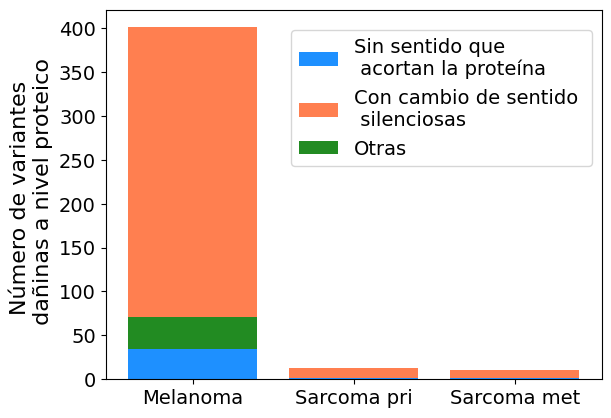

In [44]:
# Aggregate data
x = ['Melanoma', 'Sarcoma pri', 'Sarcoma met']
truncating = [i2_tr, i2_tr_sar, i2_tr_lung]
miss_inframe = [i2_m, i2_m_sar, i2_m_lung]
other = [i2_o, i2_o_sar, i2_o_lung]
mylabels = ['Sin sentido que \n acortan la proteína', 'Con cambio de sentido \n silenciosas', 'Otras']
 
# plot bars in stack manner
plt.bar(x, truncating, color='dodgerblue')
plt.bar(x, miss_inframe, color='coral', bottom=truncating)
plt.bar(x, other, color='forestgreen', bottom=truncating)
plt.ylabel('Número de variantes \n dañinas a nivel proteico', fontsize=16)
plt.legend(mylabels,loc = 'lower right', bbox_to_anchor=(1,0.55), fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.savefig('/workspace/projects/sjd_melos/exports_images/damage_type_allsamples.png',dpi=300,transparent=True, format='png', bbox_inches='tight')
plt.show()

In [45]:
# These are the genes affected by protein damage variants
mel_genes = sorted(variants_df[(variants_df['damage'] != '') & (variants_df['INTOGEN'] == True)]['SYMBOL'].unique())
sar_genes = sorted(sar_df[(sar_df['damage'] != '') & (sar_df['INTOGEN'] == True)]['SYMBOL'].unique())
lung_genes = sorted(lung_df[(lung_df['damage'] != '') & (lung_df['INTOGEN'] == True)]['SYMBOL'].unique())

print('Melanoma genes affected by protein damaging variants: \n ', mel_genes)
print('Sarcoma-primary genes affected by protein damaging variants: \n', sar_genes)
print('Sarcoma-metastasis genes affected by protein damaging variants: \n', lung_genes)

Melanoma genes affected by protein damaging variants: 
  ['ACVR1', 'AFF1', 'ALK', 'ALPK1', 'ANK1', 'ANKRD11', 'APC', 'ARHGAP5', 'ARHGEF10', 'ARHGEF10L', 'ARID1A', 'ARID2', 'ASXL1', 'ASXL2', 'ATF7IP', 'ATG7', 'ATM', 'ATR', 'BAP1', 'BCL11A', 'BCLAF1', 'BCOR', 'BCR', 'BIRC6', 'BLM', 'BMP6', 'BMPR1A', 'BRCA1', 'BTK', 'CACNA1D', 'CADM2', 'CARD11', 'CASZ1', 'CBL', 'CBLB', 'CCDC6', 'CCND2', 'CD79B', 'CDC73', 'CDH1', 'CDKN2A', 'CIC', 'CIITA', 'CLTCL1', 'CMTR2', 'COL1A1', 'COL2A1', 'COL6A3', 'COL6A6', 'CRTC1', 'CSF1R', 'CSMD3', 'CTCF', 'CTNNA2', 'CTNND2', 'CUX1', 'CYLD', 'CYP2C8', 'DAXX', 'DCAF12L2', 'DCC', 'DCSTAMP', 'DDR2', 'DDX3X', 'DICER1', 'DIS3', 'DOT1L', 'DROSHA', 'DSP', 'EGFR', 'EPAS1', 'EPHA2', 'EPHA3', 'EPHA7', 'ERBB2', 'ESR1', 'ETNK1', 'ETV5', 'EWSR1', 'EZH2', 'FAM135B', 'FAT1', 'FAT3', 'FAT4', 'FBLN2', 'FBN2', 'FBXO11', 'FCGBP', 'FCGR2B', 'FGD5', 'FGFR2', 'FLT4', 'FMN2', 'FOXA2', 'FOXP1', 'GATA3', 'GNAI2', 'GNAS', 'GPAA1', 'GRIN2A', 'GRM3', 'HDAC4', 'HNF1A', 'HOXC13', 'HSPG2', 'IKZF

In [46]:
print(len(mel_genes))
print(len(sar_genes))
print(len(lung_genes))
print(len(intogen_list) - (len(mel_genes) + len(sar_genes) + len(lung_genes)))

235
10
10
364


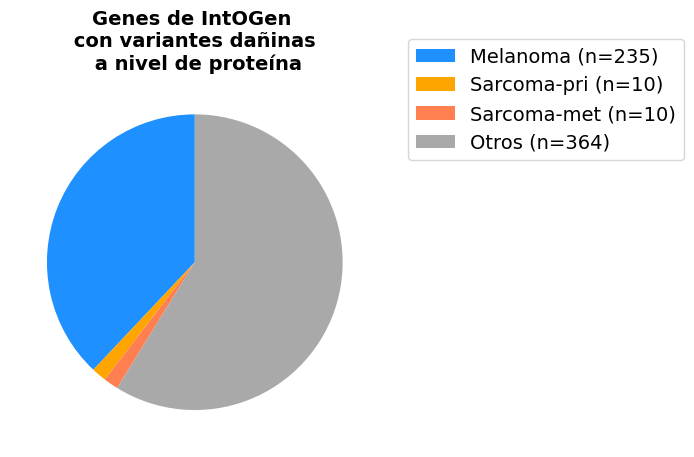

In [47]:
# Represent this data

var = [len(mel_genes), len(sar_genes), len(lung_genes), len(intogen_list) - (len(mel_genes) + len(sar_genes) + len(lung_genes))]
mylabels = ['Melanoma (n=235)','Sarcoma-pri (n=10)' ,'Sarcoma-met (n=10)', 'Otros (n=364)']
mycolors = ['dodgerblue', 'orange', 'coral', 'darkgrey'] 

plt.pie(var, colors= mycolors, shadow=False, startangle=90, textprops={'fontsize': 16})
plt.legend(mylabels,loc = 'lower right', bbox_to_anchor=(1.85,0.75), fontsize=14)
plt.title('Genes de IntOGen \n con variantes dañinas \n a nivel de proteína', fontsize = 14, weight='bold')
plt.show
plt.savefig('/workspace/projects/sjd_melos/exports_images/intogen_genes_affected.png',dpi=300,transparent=True, format='png', bbox_inches='tight')

#### In melanoma sample: Now filtering by protein damaging genes not variants:

In [48]:
drivers_df = variants_df[variants_df['INTOGEN']==True]

In [49]:
i_gtr = len(drivers_df['SYMBOL'][drivers_df['damage'].isin(['truncating'])].unique())
i_gm = len(drivers_df['SYMBOL'][drivers_df['damage'].isin(['miss_inframe'])].unique())
i_go = len(drivers_df['SYMBOL'][drivers_df['damage'].isin(['other'])].unique())

### H. Melanoma: show number of damage variants per gene in Intogen Melanoma drivers

In [50]:
## 3/ Add melanoma intogen drivers
variants_df['INTOGEN_Mel'] = variants_df['SYMBOL'].apply(lambda x: x in mel_drivers)
variants_df.groupby('INTOGEN_Mel').count()

,Uploaded_variation,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,IMPACT,DISTANCE,STRAND,FLAGS,SYMBOL,SYMBOL_SOURCE,HGNC_ID,CANONICAL,MANE_SELECT,MANE_PLUS_CLINICAL,ENSP,SOURCE,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF,CLIN_SIG,SOMATIC,PHENO,gnomADg,gnomADg_AF,gnomADg_NFE,#CHROM,POS,REF,ALT,WORSE_conseq,ID,QUAL,FILTER,INFO,FORMAT,NORMAL,TUMOR,t_AF,n_AF,t_DP,n_DP,t_alt_reads,n_alt_reads,t_ref_reads,n_ref_reads,VAF,mut_type,Caller_intersec,SAMPLE,mut,CN,CCF,INTOGEN,damage
INTOGEN_Mel,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
False,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271,1227271
True,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599,10599


In [51]:
variants_df[(variants_df['INTOGEN'] == True) & (variants_df['damage'] != '') & (variants_df['INTOGEN_Mel'])].groupby('SYMBOL').count()

,Uploaded_variation,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,IMPACT,DISTANCE,STRAND,FLAGS,SYMBOL_SOURCE,HGNC_ID,CANONICAL,MANE_SELECT,MANE_PLUS_CLINICAL,ENSP,SOURCE,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF,CLIN_SIG,SOMATIC,PHENO,gnomADg,gnomADg_AF,gnomADg_NFE,#CHROM,POS,REF,ALT,WORSE_conseq,ID,QUAL,FILTER,INFO,FORMAT,NORMAL,TUMOR,t_AF,n_AF,t_DP,n_DP,t_alt_reads,n_alt_reads,t_ref_reads,n_ref_reads,VAF,mut_type,Caller_intersec,SAMPLE,mut,CN,CCF,INTOGEN,damage,INTOGEN_Mel
SYMBOL,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
AFF1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
APC,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
ARID2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
ATM,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
ATR,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
BAP1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
BCLAF1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
BLM,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
BRCA1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [52]:
sorted_counts = variants_df[(variants_df['INTOGEN'] == True) & 
                            (variants_df['damage'] != '') & 
                            (variants_df['INTOGEN_Mel'])].groupby('SYMBOL').size().sort_values(ascending=False)

sorted_counts

SYMBOL
FAT4       9
KMT2D      8
PTPRD      7
LRP1B      6
FAT3       6
COL6A3     4
NF1        4
NBEA       4
EPHA3      4
CSMD3      4
GRM3       3
DCC        3
CBL        3
PREX2      3
RET        3
PTPRB      3
DICER1     2
POLQ       2
LIFR       2
MECOM      2
MYH11      2
NSD1       2
CUX1       2
CTNNA2     2
PTPRT      2
SETD2      2
BLM        2
SLC34A2    2
BAP1       2
ATR        2
ATM        2
NFKBIE     1
PTEN       1
ROBO2      1
PBRM1      1
TRRAP      1
PTPRC      1
AFF1       1
NF2        1
NCOR2      1
KMT2C      1
APC        1
ESR1       1
DDX3X      1
CYP2C8     1
CTNND2     1
COL1A1     1
CDKN2A     1
CADM2      1
BRCA1      1
BCLAF1     1
ARID2      1
TSC2       1
dtype: int64

In [53]:
unsorted_counts = variants_df[(variants_df['INTOGEN'] == True) & 
                            (variants_df['damage'] != '') & 
                            (variants_df['INTOGEN_Mel'])].groupby('SYMBOL').size()
len(unsorted_counts)

53

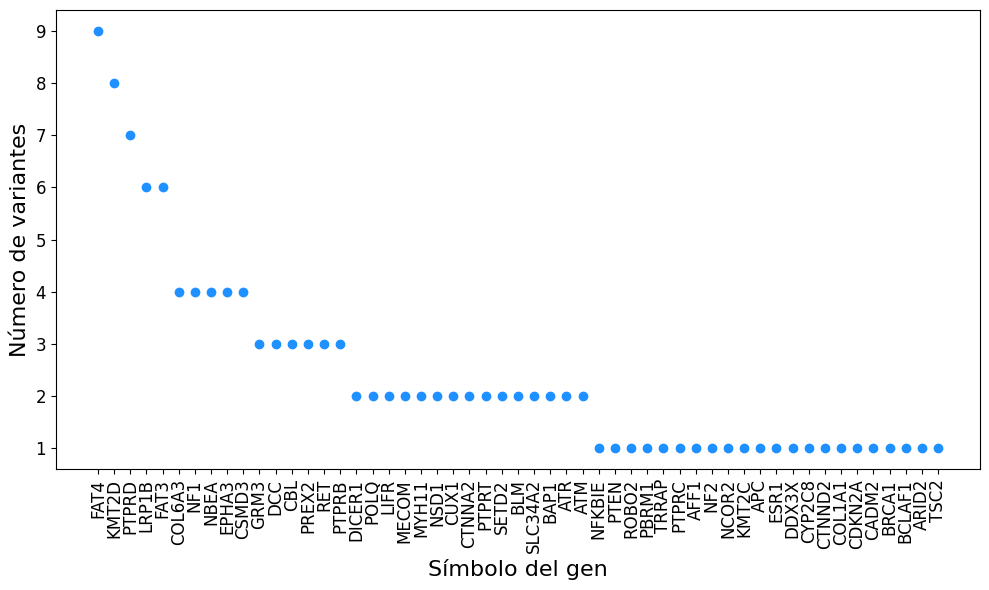

In [54]:
# Extracting data for plotting
gene_symbols = sorted_counts.index
counts = sorted_counts.values

# Creating the XY plot
plt.figure(figsize=(10, 6))
plt.scatter(range(len(gene_symbols)), counts, marker='o', color='dodgerblue')

# Adding labels and title
plt.xlabel('Símbolo del gen', fontsize=16 )
plt.ylabel('Número de variantes',fontsize=16)

# Adding tick labels for gene symbols
plt.xticks(range(len(gene_symbols)), gene_symbols, rotation=90, fontsize = 14)

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
# Displaying the plot
plt.tight_layout()
plt.savefig('/workspace/projects/sjd_melos/exports_images/58_intogen_mel_drivers_count.png',dpi=300,transparent=True, format='png', bbox_inches='tight')
plt.show()

In [55]:
FAT4_df = variants_df[(variants_df['INTOGEN'] == True) & (variants_df['damage'] != '') & (variants_df['INTOGEN_Mel']) & (variants_df['SYMBOL'] == 'FAT4')]

In [56]:
column = ['SYMBOL', 'WORSE_conseq','Amino_acids','Protein_position','CCF', 'mut_type', 'damage']
FAT4_df[column]

,SYMBOL,WORSE_conseq,Amino_acids,Protein_position,CCF,mut_type,damage
297750,FAT4,stop_gained,Q/*,3349,1.313088,SNV,truncating
297767,FAT4,missense_variant,P/L,2472,0.964219,SNV,miss_inframe
297769,FAT4,missense_variant,L/F,4340,1.145607,SNV,miss_inframe
297791,FAT4,missense_variant,PL/LL,4658-4659,0.966974,MNV,miss_inframe
297798,FAT4,missense_variant,S/Y,2479,1.078009,SNV,miss_inframe
297853,FAT4,missense_variant,S/F,1545,0.645682,SNV,miss_inframe
297884,FAT4,missense_variant,P/S,1893,0.641229,SNV,miss_inframe
297922,FAT4,missense_variant,A/V,371,0.863480,SNV,miss_inframe
297923,FAT4,missense_variant,DP/DS,919-920,0.909121,MNV,miss_inframe


In [57]:
NF1_df = variants_df[(variants_df['INTOGEN'] == True) & (variants_df['damage'] != '') & (variants_df['INTOGEN_Mel']) & (variants_df['SYMBOL'] == 'NF1')]
NF1_df[column]

,SYMBOL,WORSE_conseq,Amino_acids,Protein_position,CCF,mut_type,damage
1045517,NF1,stop_gained,Q/*,83,0.677635,SNV,truncating
1045655,NF1,missense_variant,R/C,1958,1.103386,SNV,miss_inframe
1045658,NF1,missense_variant,H/Y,2140,0.634215,SNV,miss_inframe
1045851,NF1,missense_variant,S/F,657,0.598981,SNV,miss_inframe


In [58]:
variants_df[column][(variants_df['INTOGEN'])&(variants_df['SYMBOL'] == 'FAT4')]

,SYMBOL,WORSE_conseq,Amino_acids,Protein_position,CCF,mut_type,damage
297750,FAT4,stop_gained,Q/*,3349,1.313088,SNV,truncating
297767,FAT4,missense_variant,P/L,2472,0.964219,SNV,miss_inframe
297769,FAT4,missense_variant,L/F,4340,1.145607,SNV,miss_inframe
297791,FAT4,missense_variant,PL/LL,4658-4659,0.966974,MNV,miss_inframe
297798,FAT4,missense_variant,S/Y,2479,1.078009,SNV,miss_inframe
...,...,...,...,...,...,...,...
318784,FAT4,intron_variant,-,-,0.892591,MNV,
318809,FAT4,intron_variant,-,-,0.911073,SNV,
318896,FAT4,intron_variant,-,-,1.478952,SNV,
343885,FAT4,upstream_gene_variant,-,-,0.776885,MNV,


In [59]:
sorted_counts

SYMBOL
FAT4       9
KMT2D      8
PTPRD      7
LRP1B      6
FAT3       6
COL6A3     4
NF1        4
NBEA       4
EPHA3      4
CSMD3      4
GRM3       3
DCC        3
CBL        3
PREX2      3
RET        3
PTPRB      3
DICER1     2
POLQ       2
LIFR       2
MECOM      2
MYH11      2
NSD1       2
CUX1       2
CTNNA2     2
PTPRT      2
SETD2      2
BLM        2
SLC34A2    2
BAP1       2
ATR        2
ATM        2
NFKBIE     1
PTEN       1
ROBO2      1
PBRM1      1
TRRAP      1
PTPRC      1
AFF1       1
NF2        1
NCOR2      1
KMT2C      1
APC        1
ESR1       1
DDX3X      1
CYP2C8     1
CTNND2     1
COL1A1     1
CDKN2A     1
CADM2      1
BRCA1      1
BCLAF1     1
ARID2      1
TSC2       1
dtype: int64

### Add known melanoma drivers from IntOGen data

In [60]:
meldriv_df = variants_df[variants_df['INTOGEN_Mel']==True]

In [61]:
meldriv_df[meldriv_df['damage'].isin(['truncating','miss_inframe','other'])]

,Uploaded_variation,Location,Allele,Gene,Feature,Feature_type,Consequence,cDNA_position,CDS_position,Protein_position,Amino_acids,Codons,Existing_variation,IMPACT,DISTANCE,STRAND,FLAGS,SYMBOL,SYMBOL_SOURCE,HGNC_ID,CANONICAL,MANE_SELECT,MANE_PLUS_CLINICAL,ENSP,SOURCE,AF,AFR_AF,AMR_AF,EAS_AF,EUR_AF,SAS_AF,CLIN_SIG,SOMATIC,PHENO,gnomADg,gnomADg_AF,gnomADg_NFE,#CHROM,POS,REF,ALT,WORSE_conseq,ID,QUAL,FILTER,INFO,FORMAT,NORMAL,TUMOR,t_AF,n_AF,t_DP,n_DP,t_alt_reads,n_alt_reads,t_ref_reads,n_ref_reads,VAF,mut_type,Caller_intersec,SAMPLE,mut,CN,CCF,INTOGEN,damage,INTOGEN_Mel
337,chr1_198735156_GG_AA,chr1:198735156-198735157,AA,ENSG00000081237,ENST00000442510,Transcript,missense_variant,2448-2449,2307-2308,769-770,ME/IK,atGGaa/atAAaa,-,MODERATE,-,1,-,PTPRC,HGNC,HGNC:9666,YES,NM_002838.5,-,ENSP00000411355,-,-,-,-,-,-,-,-,-,-,-,-,-,chr1,198735156,GG,AA,missense_variant,.,284,PASS,LPS=26789;LPS_RC=11;RC=ATAAAAG;RC_IDX=2;RC_LF=...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:138,0:0:138:4575,0:147,0:0,0,0,0,0,138,1...","./.:30:87,11:0.112:98:2667,336:88,11:10,1,0,0,...",0.112,0.000000,98,138,11,0,87,138,0.112000,MNV,Mutect_SAGE,melanoma,chr1_198735156_GG_AA,2.0207,0.935652,True,miss_inframe,True
99153,chr2_79651564_C_T,chr2:79651564,T,ENSG00000066032,ENST00000402739,Transcript,missense_variant,170,8,3,S/L,tCg/tTg,"rs745947461,COSV63552800",MODERATE,-,1,-,CTNNA2,HGNC,HGNC:2510,YES,NM_001282597.3,-,ENSP00000384638,-,-,-,-,-,-,-,-,"0,1","0,1",rs745947461,1.31428e-05,-,chr2,79651564,C,T,missense_variant,.,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=119,107|7,8;D...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:106,0:9.233e-03:106:45,0:56,0:104,0:56,50,0,0","0/1:120,15:0.115:135:54,7:56,7:118,15:63,57,7,8",0.115,0.009233,135,106,15,0,120,106,0.111111,SNV,Mutect_Strelka,melanoma,chr2_79651564_C_T,2.9577,1.032337,True,miss_inframe,True
99244,chr2_79874172_C_T,chr2:79874172,T,ENSG00000066032,ENST00000402739,Transcript,missense_variant,844,682,228,L/F,Ctc/Ttc,"COSV63581573,COSV63599755",MODERATE,-,1,-,CTNNA2,HGNC,HGNC:2510,YES,NM_001282597.3,-,ENSP00000384638,-,-,-,-,-,-,-,-,"1,1","1,1",-,-,-,chr2,79874172,C,T,missense_variant,.,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=121,109|8,16;...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:110,0:9.118e-03:110:48,0:52,0:106,0:56,54,0,0","0/1:120,24:0.172:144:56,11:59,12:117,24:65,55,...",0.172,0.009118,144,110,24,0,120,110,0.166667,SNV,Mutect_Strelka,melanoma,chr2_79874172_C_T,2.9577,1.548506,True,miss_inframe,True
99367,chr2_237387767_G_A,chr2:237387767,A,ENSG00000163359,ENST00000295550,Transcript,missense_variant,1369,1127,376,S/L,tCa/tTa,-,MODERATE,-,-1,-,COL6A3,HGNC,HGNC:2213,YES,NM_004369.4,-,ENSP00000295550,-,-,-,-,-,-,-,-,-,-,-,-,-,chr2,237387767,G,A,missense_variant,.,.,PASS,"AS_FilterStatus=SITE;AS_SB_TABLE=115,130|7,7;D...",GT:AD:AF:DP:F1R2:F2R1:FAD:SB,"0/0:148,0:6.818e-03:148:73,0:68,0:144,0:66,82,0,0","0/1:97,14:0.134:111:49,4:45,9:96,14:49,48,7,7",0.134,0.006818,111,148,14,0,97,148,0.126126,SNV,Mutect_Strelka,melanoma,chr2_237387767_G_A,2.1324,1.067750,True,miss_inframe,True
99405,chr2_237344548_GG_AA,chr2:237344548-237344549,AA,ENSG00000163359,ENST00000295550,Transcript,missense_variant,7711-7712,7469-7470,2490,A/V,gCC/gTT,-,MODERATE,-,-1,-,COL6A3,HGNC,HGNC:2213,YES,NM_004369.4,-,ENSP00000295550,-,-,-,-,-,-,-,-,-,-,-,-,-,chr2,237344548,GG,AA,missense_variant,.,250,PASS,LPS=71773;LPS_RC=10;MSG=1;RC=ATAACA;RC_IDX=2;R...,GT:ABQ:AD:AF:DP:RABQ:RAD:RC_CNT:RC_IPC:RC_JIT:...,"./.:0:136,0:0:137:4262,0:139,0:0,0,0,0,0,136,1...","./.:30:123,10:0.075:133:4050,307:131,10:8,2,0,...",0.075,0.000000,133,137,10,0,123,136,0.075000,MNV,Mutect_SAGE,melanoma,chr2_237344548_GG_AA,2.1324,0.634930,True,miss_inframe,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082077,chr18_53215605_GG_AA,chr18:53215605-5

In [62]:
m_gtr = len(meldriv_df['SYMBOL'][meldriv_df['damage'].isin(['truncating'])].unique())
m_gm = len(meldriv_df['SYMBOL'][meldriv_df['damage'].isin(['miss_inframe'])].unique())
m_go = len(meldriv_df['SYMBOL'][meldriv_df['damage'].isin(['other'])].unique())

In [63]:
print(m_gtr, m_gm, m_go)
10+49+9

10 49 9


68

In [64]:
column = ['SYMBOL', 'WORSE_conseq','Amino_acids','Protein_position','CCF', 'mut_type', 'damage']

In [65]:
meldriv_df[meldriv_df['damage'].isin(['truncating'])].sort_values(by='SYMBOL')[column]

,SYMBOL,WORSE_conseq,Amino_acids,Protein_position,CCF,mut_type,damage
602529,CSMD3,stop_gained,W/*,2680,1.048397,SNV,truncating
380151,CTNND2,splice_acceptor_variant,-,?-659,1.056464,MNV,truncating
713041,CYP2C8,splice_acceptor_variant,-,-,1.128211,SNV,truncating
771720,FAT3,stop_gained,DQ/D*,4375-4376,0.782403,MNV,truncating
297750,FAT4,stop_gained,Q/*,3349,1.313088,SNV,truncating
208750,MECOM,splice_donor_variant,-,205-?,0.797782,MNV,truncating
893837,NBEA,splice_donor_variant,-,1518-?,1.194902,MNV,truncating
1045517,NF1,stop_gained,Q/*,83,0.677635,SNV,truncating
1183718,NF2,stop_gained,R/*,341,1.254900,SNV,truncating
602524,PREX2,splice_acceptor_variant,-,-,0.940543,SNV,truncating


In [66]:
meldriv_df[meldriv_df['damage'].isin(['miss_inframe'])].sort_values(by='SYMBOL')[column]

,SYMBOL,WORSE_conseq,Amino_acids,Protein_position,CCF,mut_type,damage
297945,AFF1,missense_variant,L/F,973,0.945218,SNV,miss_inframe
380258,APC,missense_variant,H/Y,1845,0.812269,SNV,miss_inframe
834205,ARID2,missense_variant,A/V,207,1.121744,SNV,miss_inframe
772088,ATM,missense_variant,R/C,692,0.566770,SNV,miss_inframe
772110,ATM,missense_variant,VP/VS,382-383,0.939328,MNV,miss_inframe
...,...,...,...,...,...,...,...
209184,ROBO2,missense_variant,P/L,1203,1.412094,MNV,miss_inframe
209086,SETD2,missense_variant,P/S,101,1.326354,SNV,miss_inframe
208824,SETD2,missense_variant,R/C,2510,1.028435,SNV,miss_inframe
297995,SLC34A2,missense_variant,P/L,3,0.782565,SNV,miss_inframe


In [67]:
meldriv_df[meldriv_df['damage'].isin(['other'])].sort_values(by='SYMBOL')[column]

,SYMBOL,WORSE_conseq,Amino_acids,Protein_position,CCF,mut_type,damage
772163,CBL,splice_region_variant,-,-,0.832013,SNV,other
772165,CBL,splice_region_variant,-,-,0.551588,SNV,other
99681,COL6A3,splice_region_variant,V,1947,0.775487,SNV,other
1082077,DCC,splice_region_variant,-,-,1.107602,MNV,other
209200,EPHA3,splice_region_variant,-,-,0.938988,SNV,other
533992,GRM3,splice_region_variant,V,157,1.997751,SNV,other
99660,LRP1B,splice_region_variant,-,-,0.828460,SNV,other
668172,PTPRD,splice_region_variant,E,70,0.939279,SNV,other
298011,SLC34A2,splice_region_variant,-,-,0.932150,SNV,other
1011021,TSC2,splice_region_variant,-,-,0.717931,MNV,other
